<h2>Experimenting with redshift transformations</h2>

<h3>1 - Converting data to redshift z</h3>

Here we are experimenting with the flux corrections associated with redshif. For a spectrum expressed in $f_{\nu}$ units, "photon energies and arrival rates are redshifted, reducing the flux density by a factor $(1+z)^2$; opposing this, the bandwidth $d_{\nu}$ is reduced by a factor $(1+z)$, so the energy flux per unit bandwidth goes down by one power of $(1+z)$; finally, the observed photons at frequency $\nu_{0}$ were emitted at frequency $\nu_{0}(1+z)$, so the flux density is the luminosity at this frequency, divided by the total area, divided by $(1+z)$" (https://ned.ipac.caltech.edu/level5/Peacock/Peacock3_4.html)

From this, we infer that if a spectrum is expressed in photnu units, flux density  is invariant with redshift, because the redshift terms cancel each other (in the above reasoning, we are now counting photons and not photon energies, so one of the $(1+z)$ terms does not appear). By the same token, flux density in $f_{\lambda}$ units decreases by a factor $(1+z)^{3}$ because the bandwidth $d_{\lambda}$ increases by $(1+z)$. 

We can accomodate transformation for all flux density units in a single, generic transformation, where we first convert the fluxes to photnu, then recalculate the spectral variable value associated with each spectrum point, and then convert fluxes back to their original units. 

The alternative is to scale flux density directly by multiplying by the appropriate factor $(1+z)^{n}$, where {n = 0, -1, -2, ...} depending on the units of the spectrum, both flux density and the independent variable. And also the target units in case we want to combine the redshift operation with a units conversion operation. We still have to figure out how to handle bandwidths expressed in energy units (eV), and the $n$ factors to use with other units such as Jy, Watt, $\nu f_{\nu}$, $phot f_{\lambda}$, ABMAG, and all other combinations. With the units conversion method above, all of this is included already. 

In [1]:
from __future__ import print_function

import numpy as np
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

# constants for plotting
micron_label = '$\lambda$($\mu$)'
angstrom_label = '$\lambda$($\AA$)'
frequency_label = r'$\nu$(Hz)'
energy_label = r'$E$(eV)'
fnu_label = 'erg.cm$^{-2}$.s$^{-1}$.$Hz^{-1}$'
photnu_label = 'photon.cm$^{-2}$.s$^{-1}$.$Hz^{-1}$'
flambda_label = 'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$'
plot_axis = [0.8, 2.4, 2.8e-15, 4.e-15]

# read data. This spectrum is expressed in flam as a function of wavelength in micron
data = np.genfromtxt("data/example_spec_ipac.txt")
wave = data[:,0]
flux = data[:,1]

# define some flux density units
photnu = u.photon/u.cm**2/u.s/u.Hz
fnu = u.erg/u.cm**2/u.s/u.Hz 
flambda = u.erg/u.cm**2/u.s/u.AA

z = 0.3

### Lets pretend the original spectrum is expressed in $phot_{\nu}$ as a function of $\nu$

In this case, flux density should be invariant with redshift, and flux should drop with $(1+z)$ since the bandwidth $d_{\nu}$ drops with $(1+z)$

In [2]:
# pretend flux density units is photnu for this test
flux_units = photnu

# build a pretend frequency array based on the spectrum wavelengths
freq = (wave * u.micron).to(u.Hz,  equivalencies=u.spectral())

# redshift the frequency array
freq_r = freq / (1.+z)

# convert from input units to photnu units, shift the spectral variable, and 
# convert back to photnu. In this case it should act as a no-op. 
a = (flux * flux_units).to(photnu, equivalencies=u.spectral_density(np.mean(freq))) 
flux_r = a.to(flux_units, equivalencies=u.spectral_density((np.mean(freq_r))))

# Compare total fluxes before and after the redshift.
delta = -(freq[1:] - freq[:-1])
sum_f = np.sum((flux[1:] * delta).value)
print("Total flux of input spectrum = %g" % sum_f)
delta = -(freq_r[1:] - freq_r[:-1])
sum_f = np.sum((flux_r[1:] * delta).value) * (1.+z)
print("Total flux of redshifted spectrum at z=%4.2f, corrected by (1.+z) = %g" % (z, sum_f))
# The total flux scales down by (1+z) as expected.

Total flux of input spectrum = 4.15241
Total flux of redshifted spectrum at z=0.30, corrected by (1.+z) = 4.15241


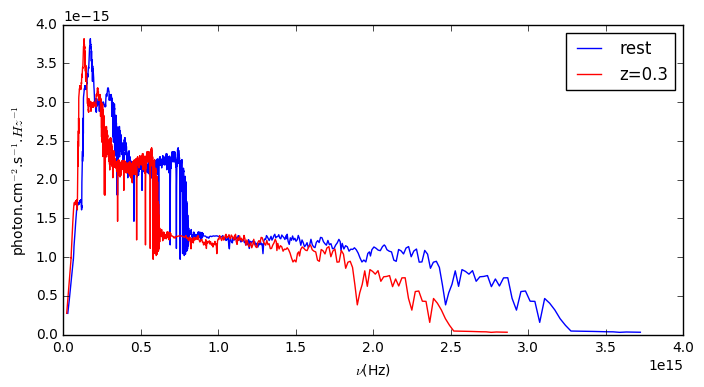

In [3]:
# flux density does not change, as expected.
plt.gcf().set_size_inches(8.,4.)
plt.plot(freq, flux, color='b', label='rest')
plt.plot(freq_r, flux_r, color='r', label='z='+str(z))
plt.xlabel(frequency_label)
plt.ylabel(photnu_label)
plt.legend()

### Now, pretend the original spectrum is expressed in $f_{\nu}$ as a function of $\nu$

In this case, flux density should drop by $(1+z)$ with redshift, and flux should drop with $(1+z)^{2}$ since the bandwidth $d_{\nu}$ drops with $(1+z)$ and photon energies also drop by $(1+z)$.

In [4]:
# pretend flux density is expressed in fnu for this test
flux_units = fnu

# again, build pretend frequency array based on the spectrum wavelengths
# and redshift it
freq = (wave * u.micron).to(u.Hz,  equivalencies=u.spectral())
freq_r = freq / (1.+z)

# convert from input units to photnu units, shift the spectral variable, and 
# convert back to photnu. This is the same python code as before.
a = (flux * flux_units).to(photnu, equivalencies=u.spectral_density(np.mean(freq))) 
flux_r = a.to(flux_units, equivalencies=u.spectral_density((np.mean(freq_r))))

# Compare total fluxes before and after the redshift.
delta = -(freq[1:] - freq[:-1])
sum_f = np.sum((flux[1:] * delta).value)
print("Total flux of input spectrum = %g" % sum_f)
delta = -(freq_r[1:] - freq_r[:-1])
sum_f = np.sum((flux_r[1:] * delta).value) * (1.+z)**2
print("Total flux of redshifted spectrum at z=%4.2f, corrected by (1.+z)^2 = %g" % (z, sum_f))
# The total flux scales down by (1+z)**2 as expected.

Total flux of input spectrum = 4.15241
Total flux of redshifted spectrum at z=0.30, corrected by (1.+z)^2 = 4.15241


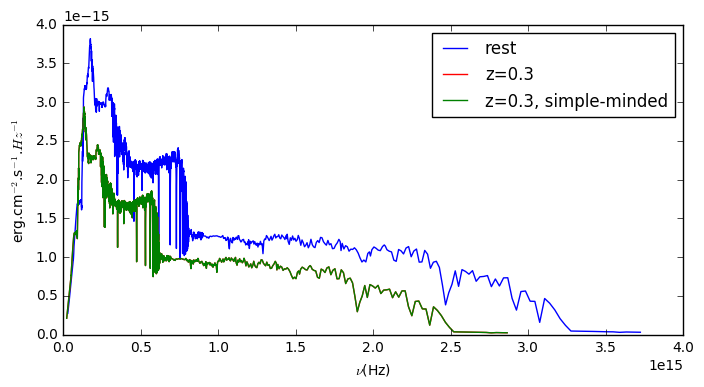

In [5]:
# flux density scales down by (1+z)
plt.gcf().set_size_inches(8.,4.)
plt.plot(freq, flux, color='b', label='rest')
plt.plot(freq_r, flux_r, color='r', label='z='+str(z))
plt.plot(freq_r, flux/(1.+z), color='g', label='z='+str(z)+', simple-minded')
plt.xlabel(frequency_label)
plt.ylabel(fnu_label)
plt.legend()

### Encapsulate flux density correction in a function

Instead of repeating it over and over.

In [6]:
def redshift_correction(spectral_variable, redshifted_spectral_variable, flux_density):
    '''
    Parameters
    ----------
    spectral_variable: Quantity
        the independent spectral variable, with units
    redshifted_spectral_variable: Quantity
        the redshifted independent spectral variable, with units
    flux_density: Quantity
        the flux density, with units

    Returns
    -------
    Quantity
        array with corrected flux density values
    '''
    # convert from input units to photnu units, shift the spectral variable, and 
    # convert back to photnu. 
    midpoint = int(len(spectral_variable)/2)
    a = flux_density.to(u.photon/u.cm**2/u.s/u.Hz, equivalencies=u.spectral_density(spectral_variable[midpoint])) 
    return a.to(flux_density.unit, equivalencies=u.spectral_density(redshifted_spectral_variable[midpoint]))

### Apply to real data

In [7]:
# use real data here. In the input spectrum, wavelenghts are 
# expressed in micron and flux densities in flam.
wave_r = wave * (1.+z)

# get corrected flux densities.
flux_r = redshift_correction(wave*u.micron, wave_r*u.micron, flux*flambda)

# Compare total fluxes before and after the redshift.
delta = wave[1:] - wave[:-1]
sum_f = np.sum((flux[1:] * delta))
print("Total flux of input spectrum = %g" % sum_f)
delta = wave_r[1:] - wave_r[:-1]
sum_f = np.sum((flux_r[1:] * delta).value) * (1.+z)**2
print("Total flux of redshifted spectrum at z=%4.2f, corrected by (1.+z)^2 = %g" % (z, sum_f))
# The total flux scales down by (1+z)**2, since flux density drops with
# (1+z)**3 and the bandwidth scales up by (1+z). 

Total flux of input spectrum = 1.22286e-14
Total flux of redshifted spectrum at z=0.30, corrected by (1.+z)^2 = 1.22286e-14


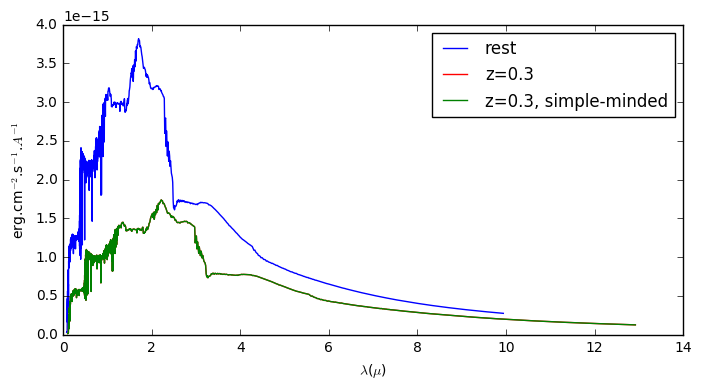

In [8]:
# flux density scales down by (1+z)**3
plt.gcf().set_size_inches(8.,4.)
plt.plot(wave, flux, color='b', label='rest')
plt.plot(wave_r, flux_r, color='r', label='z='+str(z))
plt.plot(wave_r, flux/(1.+z)**3, color='g', label='z='+str(z)+', simple-minded')
plt.xlabel(micron_label)
plt.ylabel(flambda_label)
plt.legend()

### Lets try with pretend energy units

In [9]:
energy = np.linspace(0.1,0.6,len(wave)) 
energy_r = energy / (1.+z)

flux_r = redshift_correction(energy*u.eV, energy_r*u.eV, flux*flambda)

delta = energy[1:] - energy[:-1]
sum_f = np.sum((flux[1:] * delta))
print("Total flux of input spectrum = %g" % sum_f)
delta = energy_r[1:] - energy_r[:-1]
sum_f = np.sum((flux_r[1:] * delta).value) * (1.+z)**4
print("Total flux of redshifted spectrum at z=%4.2f, corrected by (1.+z)^4 = %g" % (z, sum_f))
# The total flux scales down by (1+z)**4. 

Total flux of input spectrum = 1.07854e-15
Total flux of redshifted spectrum at z=0.30, corrected by (1.+z)^4 = 1.07854e-15


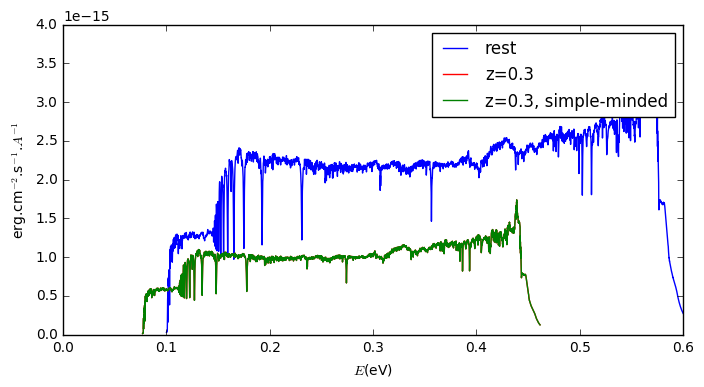

In [10]:
# flux density scales down by (1+z)**3
plt.gcf().set_size_inches(8.,4.)
plt.plot(energy, flux, color='b', label='rest')
plt.plot(energy_r, flux_r, color='r', label='z='+str(z))
plt.plot(energy_r, flux/(1.+z)**3, color='g', label='z='+str(z)+', simple-minded')
plt.xlabel(energy_label)
plt.ylabel(flambda_label)
plt.legend()

### Use pysynphot to independently verify the above computations

#### THIS IS IN ERROR: I get different results from running the same script under different pysynphot installations.

Total flux of rest spectrum = 2.9997e-05
Total flux of redshifted spectrum at z=0.50, corrected by (1.+z)^2 = 6.74931e-05


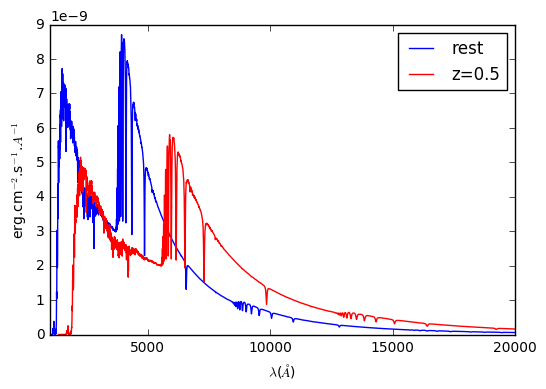

In [11]:
import pysynphot as S

vega = S.Vega
delta = vega.wave[1:] - vega.wave[:-1]
sum_f = np.sum(vega.flux[1:] * delta)
print("Total flux of rest spectrum = %g" % sum_f)
plt.plot(vega.wave, vega.flux, label='rest')

# Vega spectrum is expressed in flam units. We convert to 
# photnu units so flux density becomes invariant under 
# redshift transformations. Then we convert back to original
# flam units. 
z = 0.5
vega = S.Vega
vega.convert('photnu') 
vega = vega.redshift(z)
vega.convert('flam') 
delta = vega.wave[1:] - vega.wave[:-1]
sum_f = np.sum(vega.flux[1:] * delta) * (1.+z)**2
print("Total flux of redshifted spectrum at z=%4.2f, corrected by (1.+z)^2 = %g" % (z, sum_f))
plt.plot(vega.wave, vega.flux, color='r', label='z='+str(z))
plt.xlabel(angstrom_label)
plt.ylabel(flambda_label)
plt.xlim(1000, 20000)
plt.legend()

<h3>2 - Converting models to/from redshift z  -  UNDER CONSTRUCTION   </h3>

Here we experiment with the model composition method to handle redshifts in the astropy context, including the issue of flux density corrections.